# Итоговое задание

Дан файл HR.csv с данными по опросу уровня удовлетворенности сотрудниками работой.
Файл доступен по ссылке

Признаки:

    - satisfaction_level - Уровень удовлетворенности работой
    - Last_evaluation - Время с момента последней оценки в годах
    - number_projects - Количество проектов, выполненных за время работы
    - average_monthly_hours - Среднее количество часов на рабочем месте в месяц
    - time_spend_company - Стаж работы в компании в годах
    - work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
    - left - уволился ли сотрудник
    - promotion_last_5years - повышался ли сотрудник за последние пять лет
    - department - отдел в котором работает сотрудник
    - salary - относительный уровень зарплаты

## Требуется выполнить следующие задания:

    1.	Загрузите файл HR.csv в pandas dataframe/	

    2.	Рассчитайте основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).

    3.	Рассчитайте и визуализировать корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные.	

    4.	Рассчитайте сколько сотрудников работает в каждом департаменте.	

    5.	Показать распределение сотрудников по зарплатам.

    6.	Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности.

    7.	Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом.

    8.	Рассчитать следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности): 
      a) Доля сотрудников с повышением за последние 5 лет; 
      b) Средняя степень удовлетворенности; 
      c) Среднее количество проектов.
  
    9.	Разделить данные на тестовую и обучающую выборки. Построить модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary) Оценить качество модели на тестовой выборки.	

    10.	Загрузить jupyter notebook с решением на github и прислать ссылку.	


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats 
import math

## Задание 1

Загрузим данные из файла 'HR.csv' и посмотрим на них.

In [2]:
hr = pd.read_csv('HR.csv')

In [3]:
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB



    Мы имеем набор данных, состоящий их 15_000 строк и имеющий 10 столбцов (признаков). Пропусков и нулевых значений нет. 8 столбцов имеют числовой тип данных, 2 - строчный. 
    Из 8 числовых столбцов 2: satisfaction_level и  last_evaluation, являются неприрывными,  3: number_project, average_montly_hours, time_spend_company - дискретными, а последние 3  признака: Work_accident, left, promotion_last_5years, я бы отнесла к категориальным, так как они имеют значения только  0 или 1. 
    Признак salary - это уровень зарплаты, значит классифицирует и упорядочивают работнков по этому признаку, является порядковой переменной, можно заменить на целые числа. При анализе, уволился ли человек на основании представленных данных, уровень зарплаты может показать достаточную корреляцию. 
    Признаки department являются качественным номинальным, и их тоже можно привести к количественным данным. Присвоим им пока целые числа о 0 до 9, чтобы посмотреть, как этот признак влияет на признак left.



In [5]:
hr[['department', 'salary']].describe()

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


    Мы видим, что больше всего работников в отделе sales, и самый распространенный уровень зарплаты low.

In [6]:
# Преобразуем данные их типа object в int64

def get_numbers_instead_depart(data, str_list):                # Заменим данные в столбце department
        str_new = range(0,10)
        data.department.replace(str_list, str_new, inplace=True)
        
def get_numbers_instead_salary(data, str_list):                # Заменим данные в столбце salary
        data.salary.replace(str_list, {1, 2, 3}, inplace=True)

hr_copy = hr.copy()

get_numbers_instead_salary(hr_copy, list(hr_copy.salary.unique()))                                         
get_numbers_instead_depart(hr_copy, list(hr_copy.department.unique()))

In [7]:
hr_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  int64  
 9   salary                 14999 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


## Задание 2

    Рассчитаем основные статистические данные и дополним их ящиками с усами, так как этот вид графиков наглядно показывает распределение данных в наших признаках.


In [8]:
hr_describe = hr_copy.describe().T
get_mode = hr_copy.mode().T
hr_describe['mode'] = get_mode[0]

In [9]:
hr_describe

,count,mean,std,min,25%,50%,75%,max,mode
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0,0.10
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0,0.55
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0,4.00
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0,135.00
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0,3.00
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0,0.00
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0,0.00
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0,0.00
department,14999.0,3.339823,2.820837,0.00,0.00,3.00,6.00,9.0,0.00
salary,14999.0,1.594706,0.637183,1.00,1.00,2.00,2.00,3.0,1.00


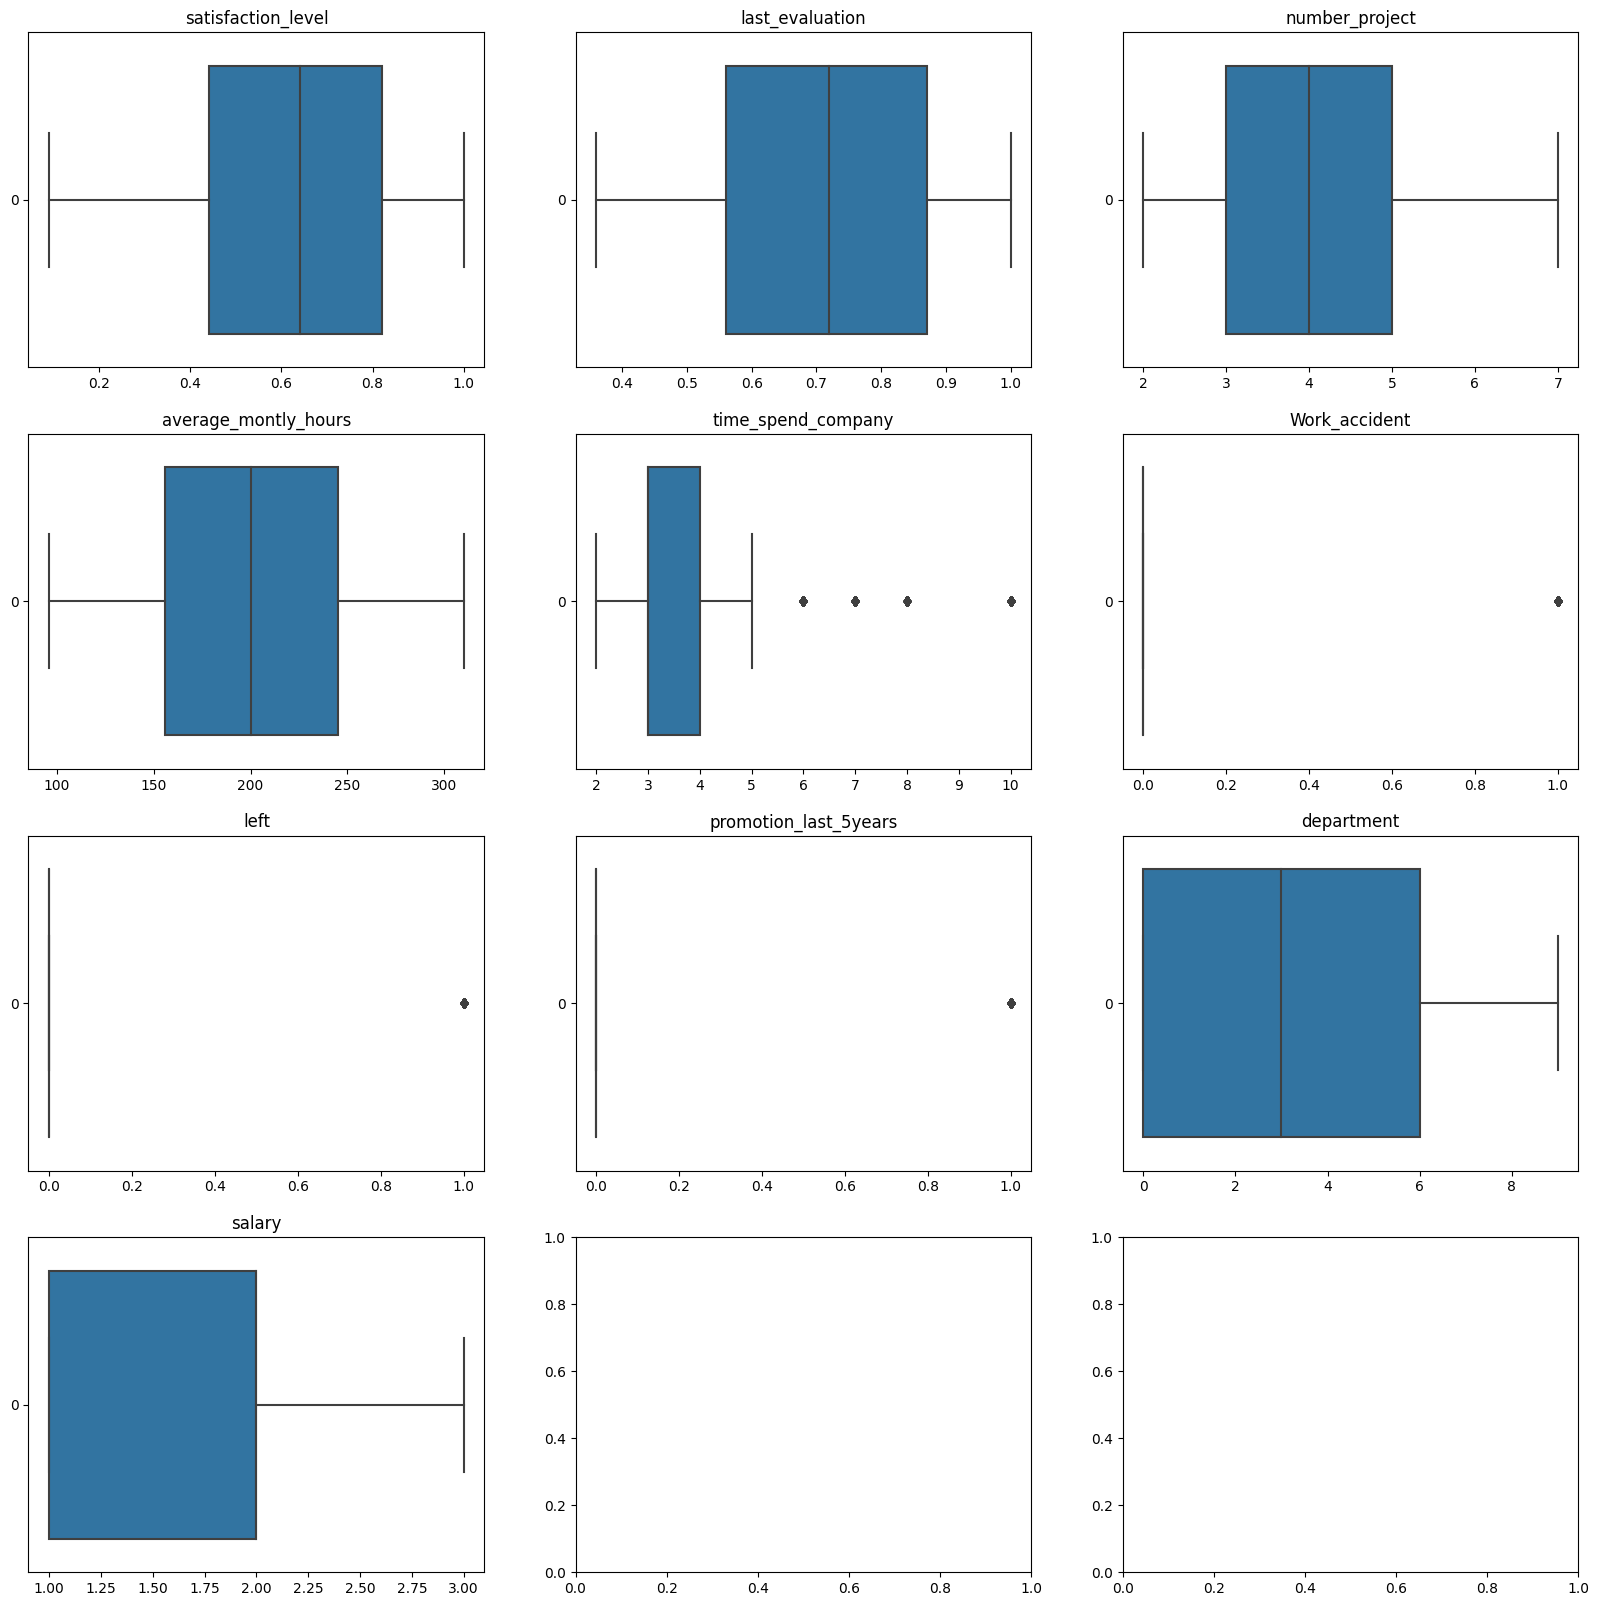

In [10]:
columns = list(hr_copy.columns)
plt.subplots(4, 3, figsize=(20,20))
for i, item in enumerate(columns):
    plt.subplot(4,3, i+1)
    plt.title(item)
    sns.boxplot(data=hr_copy[item], orient='h')


    Если данные категориальные, основное, что можно увидеть какое значение самое распространенное. Так в признаках Work_accident, left, promotion_last_5years из двух значений 0 и 1 модой является 0, т.е. отсутствие его. В department мода - 0 (sales), в salary - 1 (low).
    Почти все остальные признаки: satisfaction_level, last_evaluation, number_project, average_montly_hours, time_spend_company распределениы таким образом, что медиана приближена к среднему арифметическому, однако мода имеет меньшеe значение. 
    Рассмотрим подробнее  признак time_spend_company. Boxplot достаточно узкий, что говорит о том, что основная часть работников работает здесь от 3 до 4 лет, усы короткие, то минимальное значение - 2 года, максимум - 5 лет. Так же мы наблюдаем выбросы. То есть очень немного людей работают в кампании больше 5 лет.
    
    Распределение этих данных можно рассмотреть на гистограммах
   

array([[<AxesSubplot: title={'center': 'satisfaction_level'}>,
        <AxesSubplot: title={'center': 'last_evaluation'}>],
       [<AxesSubplot: title={'center': 'number_project'}>,
        <AxesSubplot: title={'center': 'average_montly_hours'}>],
       [<AxesSubplot: title={'center': 'time_spend_company'}>,
        <AxesSubplot: title={'center': 'department'}>]], dtype=object)

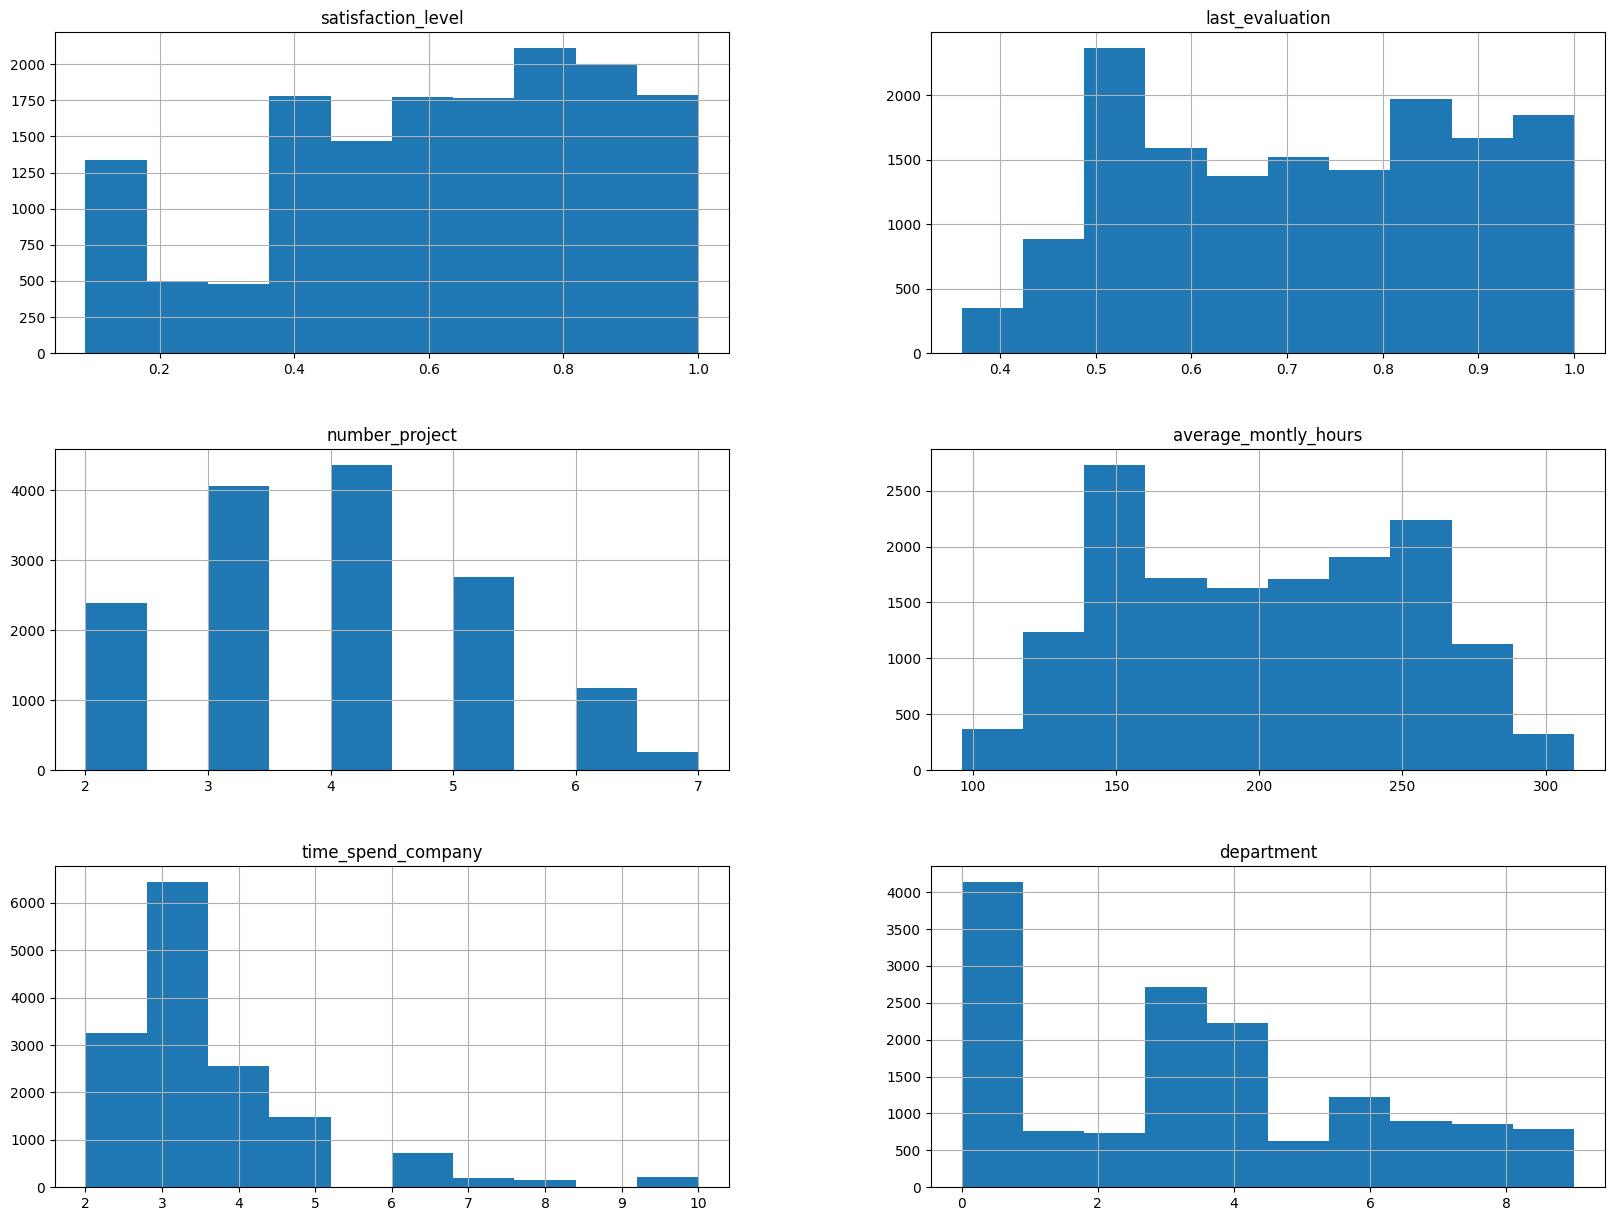

In [11]:
hr_copy[['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'department']].hist(figsize=(20,15))

    Ни один признак не имеет нормального распределения, немного похоже только распределение number_project.
    Посмотрим как отличаются распределение этих величин с точки зрения уволившихся и продолжающих работать в этой компании людей.

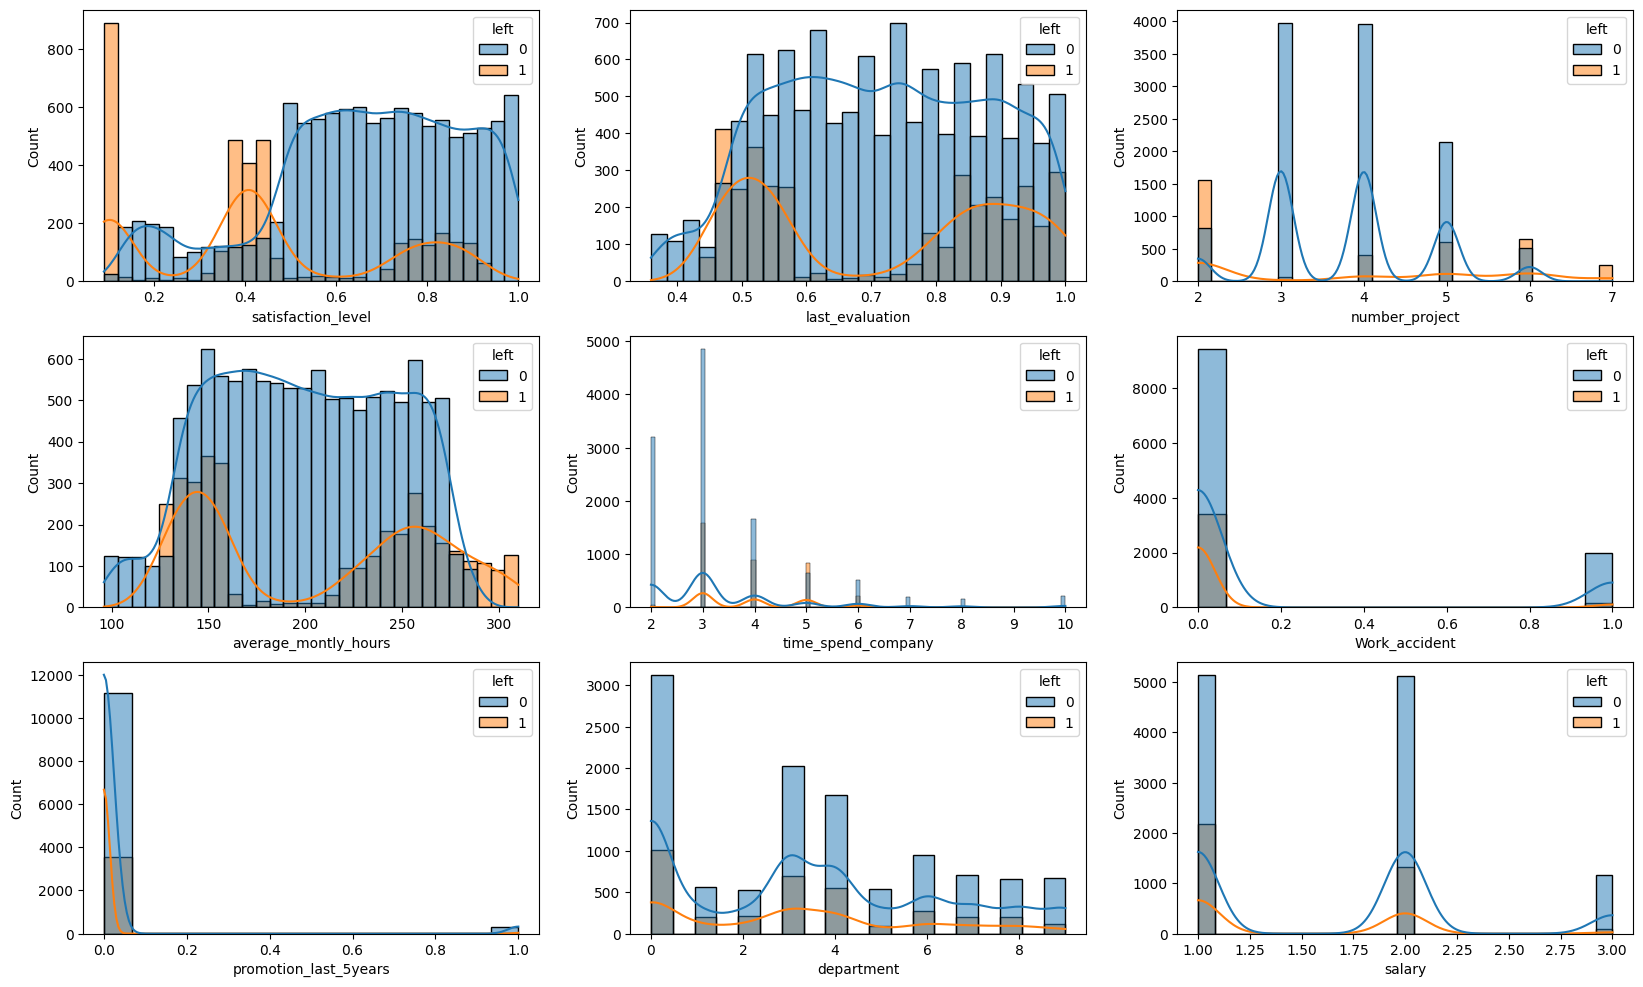

In [12]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'department', 'salary']
plt.subplots(3, 3, figsize=(20,12))
for i, item in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.histplot(data=hr_copy, x=item, hue='left', kde=True)

    Распределения данных признаков отдельно по работающим и уволившимся показывает, что они отличаются. 
    Например, больше увольняетя людей с самым низким satisfaction_level или примерно в районе 0.4, с самым низким количестаом проектов number_project, но и большинство с самым высоким значением этого признака. Больше всего людей увольняется с уровнем зарплаты low. Количество уволившихся неодинаково распределяется с работающими в признаках last_evaluation и  average_montly_hours. Что примечательно, многие люди, у которых признак average_montly_hours самый высокий, то есть в месяц они работали больше всех - уволились. 

## Задание 3

    Построим корреляционную матрицу и посмотрим как признаки коррелируют друг с другом.

Наиболее коллелируемые переменные: number_project  average_montly_hours  
Коэффициент корреляции: 0.41721
Наименее коллелируемые переменные: time_spend_company  department  
Коэффициент корреляции: -0.00161


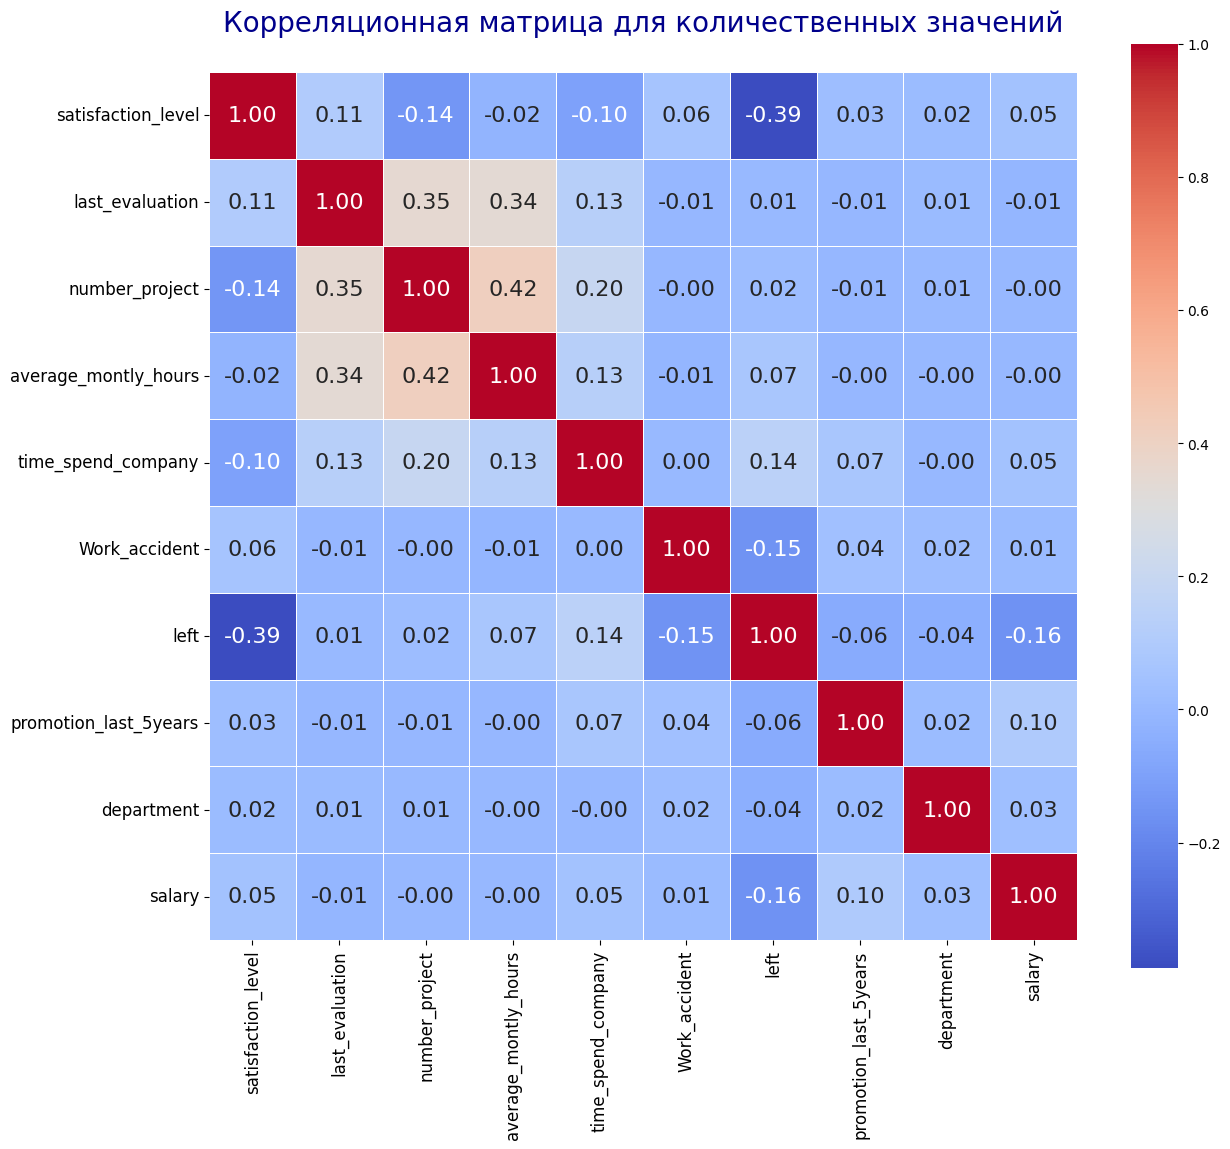

In [13]:
def get_max_koef(data):       # Вычисляет наиболее коллелируемые переменные

    ind_max = []
    data_abs = data.abs()
    max_koef_list = data_abs[data_abs <1].max()
    max_ind_list = data_abs[data_abs <1].idxmax()
    max_koef = max_koef_list.max()
    ind_max = max_koef_list.index[max_koef_list == max_koef].to_list()
    print('Наиболее коллелируемые переменные: ', end='')
    [print(item, end='  ')for item in ind_max]
    print('\nКоэффициент корреляции: %.5f' % data.at[ind_max[0], ind_max[1]])

def get_min_koef(data):       # Вычисляет наименее коллелируемые переменные

    ind_min = []
    data_abs = data.abs()
    min_koef_list = data_abs.min()
    min_ind_list = data_abs.idxmin()
    min_koef = min_koef_list.min() 
    ind_min = min_koef_list.index[min_koef_list == min_koef].to_list()
    print('Наименее коллелируемые переменные: ', end='')
    [print(item, end='  ')for item in ind_min]
    print('\nКоэффициент корреляции: %.5f' % data.at[ind_min[0], ind_min[1]])
    
def get_corr_matrix(data):    
    
    numeric_col = data.select_dtypes(include=['float64', 'int64']).columns
    corr_matrix = data[numeric_col].corr()
    plt.subplots(figsize=(14,12))
    plt.title('Корреляционная матрица для количественных значений\n', fontsize=20, color='DarkBlue')
    plt.tick_params(axis='both', labelsize=12)
    sns.heatmap(corr_matrix, annot=True, square=True, linewidth=0.5, fmt='.2f', annot_kws={'size':16}, cmap='coolwarm')#, square=True, cbar_kws=3)
    return corr_matrix

hr_corr_matrix = get_corr_matrix(hr_copy)
get_max_koef(hr_corr_matrix)
get_min_koef(hr_corr_matrix)

    Наибольший коэффициент корреляции равен 0.42, что говорит о том, что признаки не сильно коррелируют между собой. Некоторые практически не зависят дуг от друга, имея коэффициент корреляции приближенный к 0, например, признак department. 
    Наиболее коррелируемые признаки:
    number_project  average_montly_hours  - 0.42
    satisfaction_level   left             - 0.39
    number_project   last_evaluation      - 0.35

## Задание 4

    Рассмотрим распределение работников по департаментам.

,sales,technical,support,IT,product_mng,marketing,RandD,accounting,hr,management
department,4140,2720,2229,1227,902,858,787,767,739,630


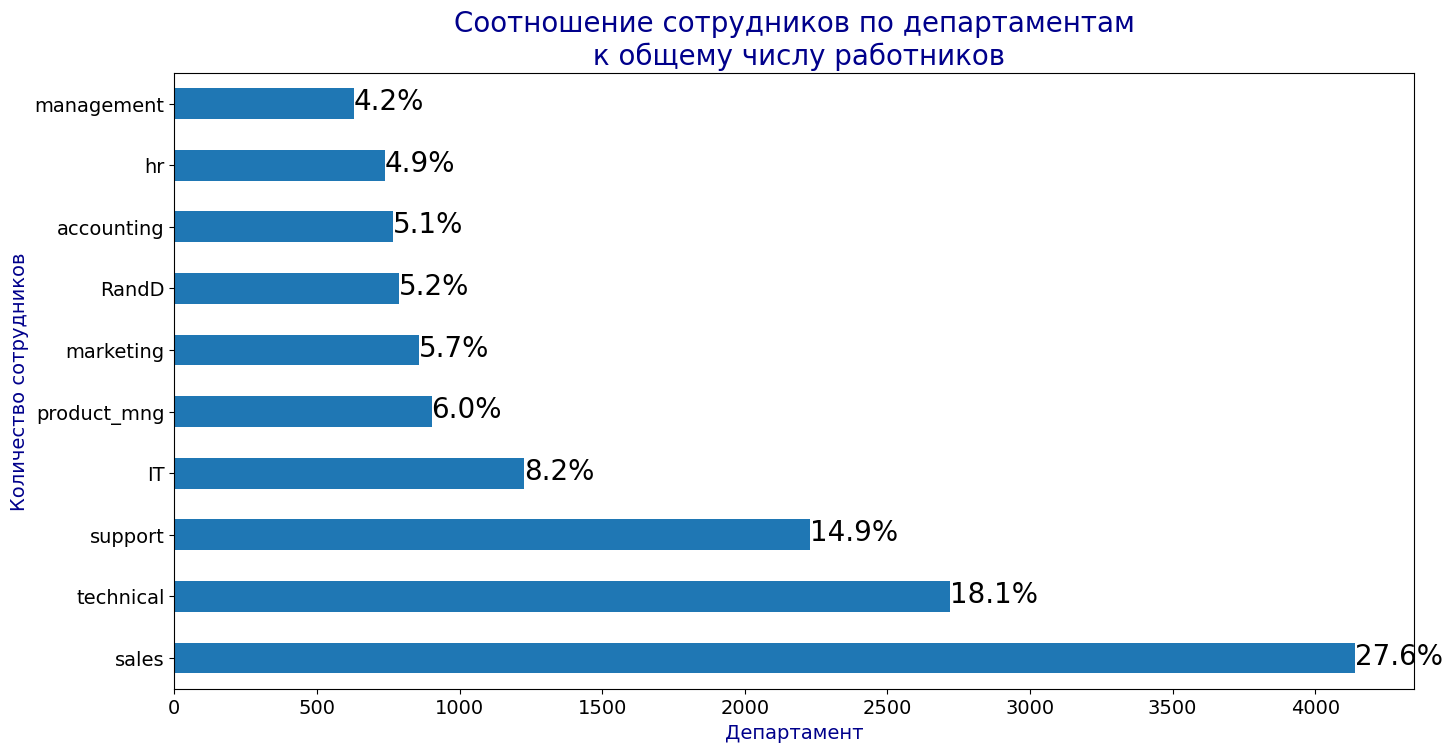

In [14]:
def number_employee(data):

    new = data.department.value_counts()
    total_employee = data.department.count()
    display(pd.DataFrame(new).T)
    plt.subplots(figsize=(16,8))
    title_plot = 'Соотношение сотрудников по департаментам\n к общему числу работников'
    new.plot.barh(title=title_plot,  rot=0)
    plt.title(title_plot , fontsize=20, color='DarkBlue')
    plt.xlabel('Департамент', fontsize=14, color='DarkBlue')
    plt.ylabel('Количество сотрудников', fontsize=14, color='DarkBlue')
    plt.tick_params(axis='both', labelsize=14)
    for index, value in enumerate(new):
        label = format(value / total_employee, '.1%')
        plt.annotate(label, xy=(value, index-0.1), color='black', fontsize=20)
    plt.show()
    return 


number_employee(hr[['department','salary']])

    Больше всего сотрудников работает в sales и technical, меньше всего - management, что логично.

## Задание 5

,low,medium,high
salary,7316,6446,1237


([<matplotlib.patches.Wedge at 0x12c9104c0>,
 [Text(0.04226778373338524, 1.0991876247748915, 'low'),
  Text(-0.32247422223497674, -1.051670279124568, 'medium'),
  Text(1.06328474507822, -0.2818253907722742, 'high')],
 [Text(0.02305515476366467, 0.5995568862408499, '49%'),
  Text(-0.1758950303099873, -0.5736383340679462, '43%'),
  Text(0.5799734973153926, -0.15372294042124043, '8%')])

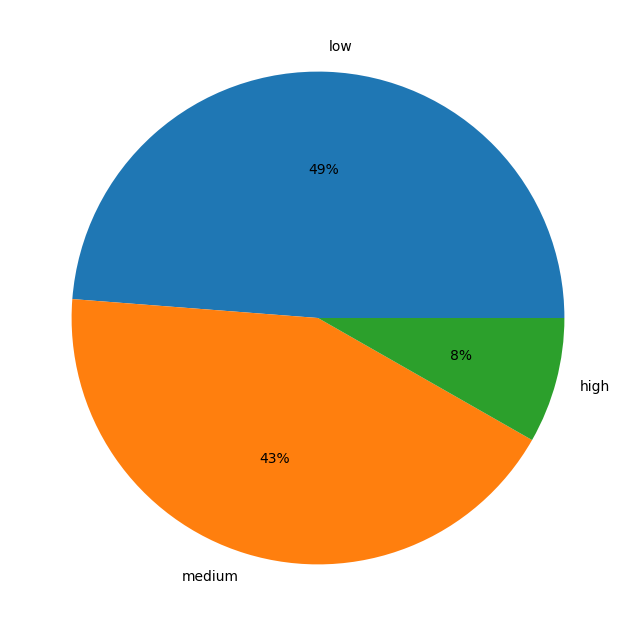

In [15]:
result_df = hr.salary.value_counts()  
display(pd.DataFrame(result_df).T)
plt.figure(figsize=(8,8))
colors = sns.color_palette('pastel')
labels = list(hr.salary.unique())#['low', 'medium', 'high']
plt.pie(result_df, labels=labels, autopct='%.0f%%')

    В процентном соотношении, больше всего сотрудников получает зарплату с уровнем low - 49, немного отстает - medium. Процент работников с уровнем зарплаты high - невысок.

department    IT  RandD  accounting   hr  management  marketing  product_mng  \
     salary                                                                    
left high     83     51          74   45         225         80           68   
     low     609    364         358  335         180        402          451   
     medium  535    372         335  359         225        376          383   

department   sales  support  technical  
     salary                             
left high      269      141        201  
     low      2099     1146       1372  
     medium   1772      942       1147

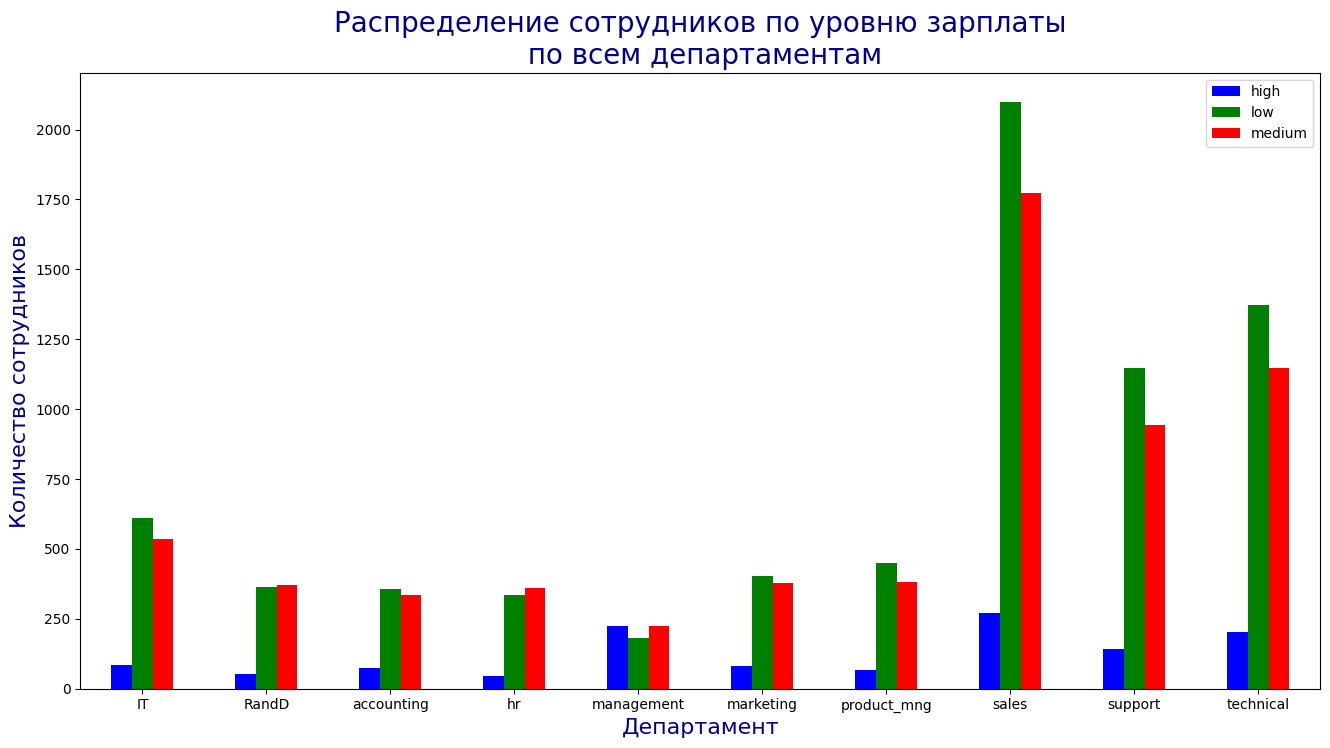

In [16]:
def get_all_depart_salary(data):
    depart_salary_pivot = pd.pivot_table(data, index=['department'],columns=['salary'], 
                                        values=['left'], aggfunc='count').squeeze()
    depart_salary_pivot.T.rename(index={('left','high'): 'high', ('left','low'):'low', ('left','medium'):'medium'},
                                 inplace=True)
    display( depart_salary_pivot.T)
    depart_salary_pivot.plot.bar(figsize=(16,8), rot=0, color={'blue', 'green', 'red'})
    legend=['high', 'low', 'medium']
    title_plot = 'Распределение сотрудников по уровню зарплаты\n по всем департаментам'
    plt.title(title_plot , fontsize=20, color='DarkBlue')
    plt.xlabel('Департамент', fontsize=16, color='DarkBlue')
    plt.ylabel('Количество сотрудников', fontsize=16, color='DarkBlue')
    plt.legend(legend)


get_all_depart_salary(hr)

    Так же можем посмотреть на распределение уровней зарплаты по департаментам. Далее это подробнее рассмотрим в процентном соотношении, что нагляднее.

# Задание 6

    На этих диаграммах видно, что во всех департаментах, кроме одного management, уровень зарплаты low саьый распростаненный, за ним с небольшим отрывом идет уровень medium, как вообщем по компании. Работников с уровнем зарплаты high значительно меньше. Только в департаменте management все примерно на равны, но high все же ниже остальных.

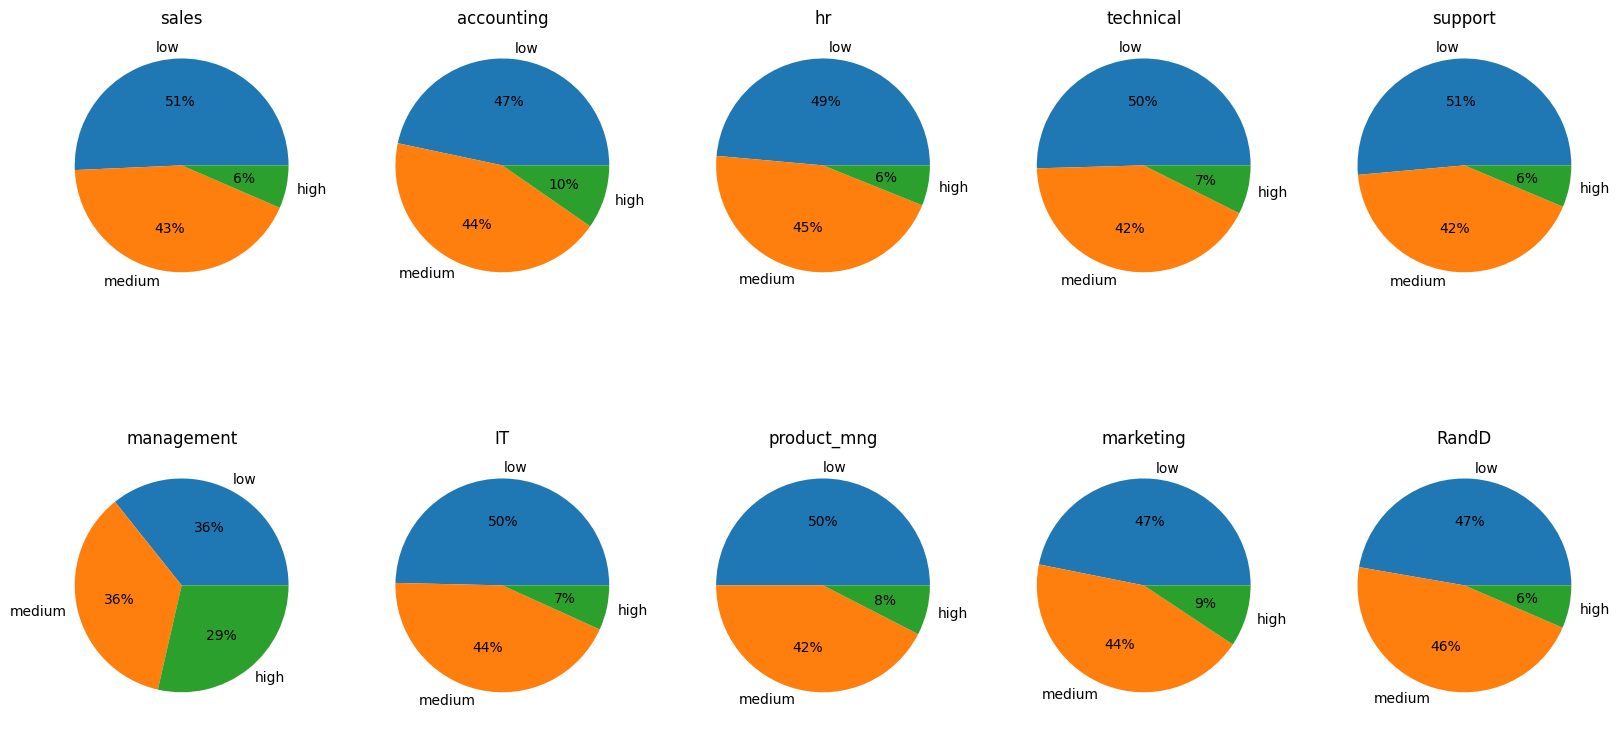

In [17]:
num_dep = int(hr.department.count())
max_x = 2
max_y = 5
plt.subplots(max_x, max_y, figsize=(20,10))
labels = list(hr.salary.unique())
depart_list = list(hr.department.unique())
for i, item in enumerate(depart_list):
    data = hr[(hr.department==item)]['salary'].value_counts()
    plt.subplot(max_x, max_y, i+1)
    plt.title(item)
    plt.pie(data, labels=labels, autopct='%.0f%%')


    Ниже представлен код, позволяющий выбрать отдельный департамент компании и показать распределение сотрудников по зарплатам по этому департаменту.

Департамент:        sales -  0
Департамент:   accounting -  1
Департамент:           hr -  2
Департамент:    technical -  3
Департамент:      support -  4
Департамент:   management -  5
Департамент:           IT -  6
Департамент:  product_mng -  7
Департамент:    marketing -  8
Департамент:        RandD -  9
Введите номер департамента: 5


,medium,high,low
salary,225,225,180


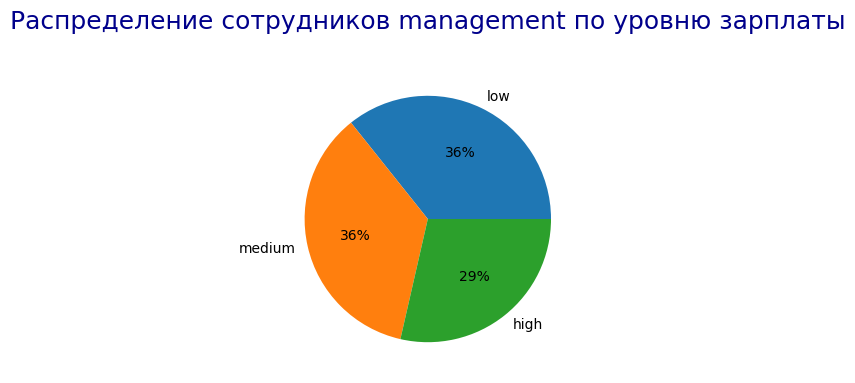

In [14]:
def info_depart_salary(data, department):    # Информация по выбранному департаменту

    data = data[(data['department'] == department)][['department', 'salary']]
    data_res = data.salary.value_counts()
    display(pd.DataFrame(data_res).T)
    get_plot(data_res, department)
    return 

def get_plot(data, department):               # График по выбранному департаменту
    
    plt.subplots(figsize=(12,4))
    title_plot = 'Распределение сотрудников '+ department +' по уровню зарплаты\n'
    labels = list(hr.salary.unique())
    plt.pie(data, labels=labels, autopct='%.0f%%')
    plt.title(title_plot , fontsize=18, color='DarkBlue')
    plt.show()


def get_department(depart_list):       # Выбор отдельного департамента для выведения данных

    [print('Департамент: %12s - %2d' %(item, i)) for i, item in enumerate(depart_list)]
    input_str = input('Введите номер департамента: ')
    return depart_list[int(input_str)]

department = get_department(hr.department.unique())

info_depart_salary(hr, department)

## Задание 7

    Проверить гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом

    Выдвигаем нулевую гипотезу Н0: что сотрудники с высоким окладом проводят на работе столько же времени, 
                               что и сотрудники с низким окладом, то есть различия незначительны.
                               
    Параллельно выдвигаем противоположную гипотезу Н1, что время, проведенное на работе, сотрудников с 
                                разными окладами различается, и эти различия статистически значимы.
                                
    Мы имеем две независимые выборки данных из нашей генеральной совокупности данных, они достаточно большие: по критерию low - 7316 измерений, по критерию  high - 1237, по критерию medium - 6446. 
    
    Уровень значимости примем alfa = 0.001, так как размер выборок достаточно большой. 
    
    Посмотрим статистическое распределение этих величин. 

,count,mean,std,min,25%,50%,75%,max
salary,,,,,,,,
high,1237.0,199.867421,47.710446,96.0,161.0,199.0,241.0,307.0
low,7316.0,200.996583,50.832214,96.0,155.0,199.0,246.0,310.0
medium,6446.0,201.338349,49.344188,96.0,156.0,201.0,245.0,310.0


<AxesSubplot: xlabel='average_montly_hours', ylabel='Density'>

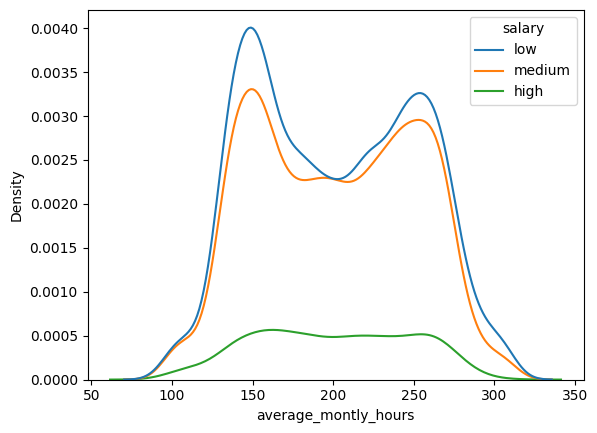

In [18]:
time_salary = hr[['average_montly_hours', 'salary']]
display( time_salary.groupby('salary')['average_montly_hours'].describe())
sns.kdeplot(data=time_salary, x='average_montly_hours', hue='salary')


<AxesSubplot: xlabel='average_montly_hours', ylabel='salary'>

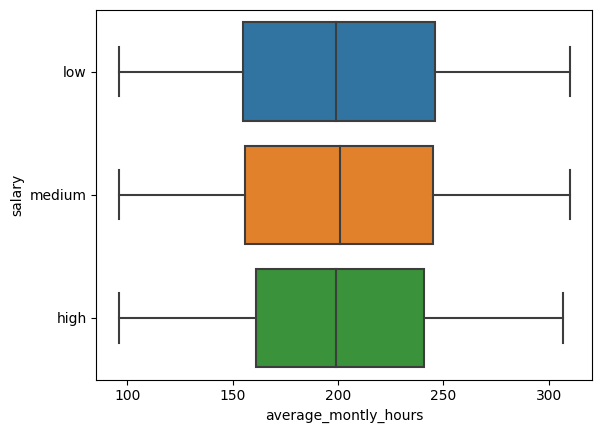

In [20]:
sns.boxplot(data=time_salary, x='average_montly_hours', y='salary')

    Средние значения и медианы примерно на одном уровне, std у категории high меньше чем у других незначительно.
    Распреление этих величин очень похожи.
    На вышестоящем графике мы можем видеть плотность распределения вероятностей признака salary по разным 
    категориям. 
    Эти распределения не похожи на нормальные. 
    Проверим нормальность распределения с помощью теста Критерия согласия Пирсона.

In [21]:
def test_normal_distr(data, category, alfa):
    print('\nПроверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона')
    print('по категории зарплаты: ', category)
    stat, p_value = stats.normaltest(data)
    print('Критерий согласия Пирсона: %.3f' % p_value)
    print('statistics: %.3f' % stat)
    if p_value > alfa:
        print('Принять гипотезу о нормальности распределения')
    else:
        print('Отклонить гипотезу о нормальности распределения')
        
alfa = 0.001    
category_list = list(hr.salary.unique())   
# Проверим для всех категорий
for item in category_list:   
        test_normal_distr(hr[hr.salary==item]['average_montly_hours'], item, alfa)


Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  low
Критерий согласия Пирсона: 0.000
statistics: 4477.067
Отклонить гипотезу о нормальности распределения

Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  medium
Критерий согласия Пирсона: 0.000
statistics: 3155.456
Отклонить гипотезу о нормальности распределения

Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  high
Критерий согласия Пирсона: 0.000
statistics: 339.678
Отклонить гипотезу о нормальности распределения


    Попробуем привести данные к нормальному распределению с помощью логарифма и опять проверим на нормальность.

In [22]:
low_salary = hr[hr.salary=='low']['average_montly_hours']
medium_salary = hr[hr.salary=='medium']['average_montly_hours']
high_salary = hr[hr.salary=='high']['average_montly_hours']

low_log = np.log2(abs(low_salary)+1)
medium_log = np.log2(abs(medium_salary)+1)
high_log = np.log2(abs(high_salary)+1)

test_normal_distr(low_log, 'low', alfa)
test_normal_distr(medium_log, 'medium', alfa)
test_normal_distr(high_log, 'high', alfa)


Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  low
Критерий согласия Пирсона: 0.000
statistics: 1547.039
Отклонить гипотезу о нормальности распределения

Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  medium
Критерий согласия Пирсона: 0.000
statistics: 895.344
Отклонить гипотезу о нормальности распределения

Проверим являются ли эти распределения нормальными с помощью Критерия согласия Пирсона
по категории зарплаты:  high
Критерий согласия Пирсона: 0.000
statistics: 84.201
Отклонить гипотезу о нормальности распределения


    Распределения признака salary по уровню зарплаты не является нормальным.
    Создадим новые выборки из существующих, но нормально распределенных, с помощью  функции sample, и проверим 
    нашу гипотезу  с помощью нормального теста Стьюдента. 


Мы создали выборку с нормальным распределением из наших данных с помощью sample
и теперь можем проверить нашу гипотезу с помощью T-теста (тест Стьюдента)

Принимаем гипотезу: H0,что обе группы  независимы и имеют равные средние количество часов на работе, то есть различия незначительны
Паралельно принимаем противоположную гипотезу Н1, что различия значительны

Критерий Стьюдента: 0.000
t-статистика: -24.003
Отклоняем Но гипотезу
Cредние значения двух распределений различны и это различие статистически значимо


<Figure size 1500x1000 with 0 Axes>

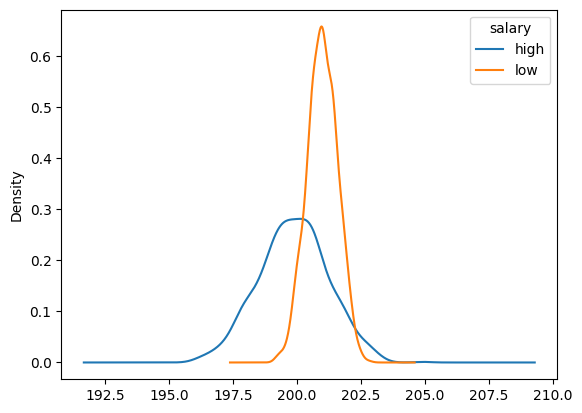

In [23]:
def get_student_stat(df_categ1, df_categ2, alfa):
    print('\nПринимаем гипотезу: H0,что обе группы  независимы и имеют равные средние количество часов на работе, то есть различия незначительны')
    print('Паралельно принимаем противоположную гипотезу Н1, что различия значительны\n')
    t, p_value = stats.ttest_ind(df_categ1, df_categ2) #Критерий Стьюдента (t-test)

    print('Критерий Стьюдента: %.3f' % p_value)
    print('t-статистика: %.3f' % t)
    if p_value < alfa:
        print('Отклоняем Но гипотезу')
        print('Cредние значения двух распределений различны и это различие статистически значимо')
    else:
        print('Мы не можем отклонить Н0 гипотезу')
        print('Обе группы имеют равное среднее количество часов на работе, то есть различия незначительны')
        

def get_Bootstrap_and_test(data, category1, category2, alfa):

    plt.figure(figsize=(15, 10))
    # boot_1d - собираем статистику по средним, для неё можно применить t-тест
    boot_1d = []
    for i in range(1000):
        boot_mean = data.sample(frac=1, replace=True).groupby(
            'salary')['average_montly_hours'].mean()  
        boot_1d.append(boot_mean)

    # Преобразование списка в DataFrame
    boot_1d = pd.DataFrame(boot_1d)
    
    # График плотности созданных с помощью  bootstrapped распределений
    boot_1d.plot(kind='density')
    print('\nМы создали выборку с нормальным распределением из наших данных с помощью sample')
    print('и теперь можем проверить нашу гипотезу с помощью T-теста (тест Стьюдента)')
    get_student_stat(boot_1d[category1], boot_1d[category2], alfa)


get_Bootstrap_and_test(time_salary[(time_salary.salary=='high')|(time_salary.salary=='low')], 'high', 'low', alfa)


        Мы получили Критерий Стьюдента намного меньше нашего уровня значимости, что позволило нам отклонить Н0 гипотезу о том, чтосредние двух выборок равны, а значение  t-статистики -24.557 говорит нам, насколько отклоняется выборочное среднее от нулевой гипотезы. То есть среднее по критерию high меньше среднего по критерию low на 24.557.
    То есть мы пришли к выводу, что средние количество рабочих часов у людей с более высоким окладом отличается от среднего количества рабочих часов у людей с низким окладом. На графики распределения плотности вероятности этих величин это можно наблюдать. 

## Задание 8

In [24]:
def get_pokazat(data):    

    research_left = data[['promotion_last_5years', 'left',  
                    'satisfaction_level', 'number_project']].groupby('left').agg({'satisfaction_level':'mean', 
                    'number_project':'mean', 'promotion_last_5years': 'mean'})

    research_left['promotion_last_5years'] *= 100
    research_left.rename(index={0:'Работают', 1:'Уволилось'}, columns={'promotion_last_5years':'Доля сотрудников с повышением в %', 'satisfaction_level':'Средняя степень удовлетворенности', 'number_project':'Среднее количество проектов'}, inplace=True)
    return research_left
    
get_pokazat(hr)

,Средняя степень удовлетворенности,Среднее количество проектов,Доля сотрудников с повышением в %
left,,,
Работают,0.666810,3.786664,2.625131
Уволилось,0.440098,3.855503,0.532064


    Из наших показателей видно, что у уволившихся работников среднее количество проектов немного больше, чем у оставшихся, однако в этой категории доля сотрудников с повышением за последние 5 лет в 5 раз меньше и , возможн,о связанный с этим уровень удовлетворенности на 20% меньше, чем у работающих в компании. Здест явно видно, что эти признаки влияют на признак left.
    satisfaction_level - самый скоррелировый признак, коэффициент корреляции -0,39, чем он выше, тем выше шанс, что человек уволится.
    promotion_last_5years - коэффициент корреляции -0,06, невысокий, однако разница между уволившимися и работающими в среднем значении этого признака видна.
    number_project - коэффициент корреляции 0,02, коэффициент мальенький, но раньше при изучении данных была выявлена интересная деталь, что люди с самым большим количеством проектов, увольнялись.

## Задание 9

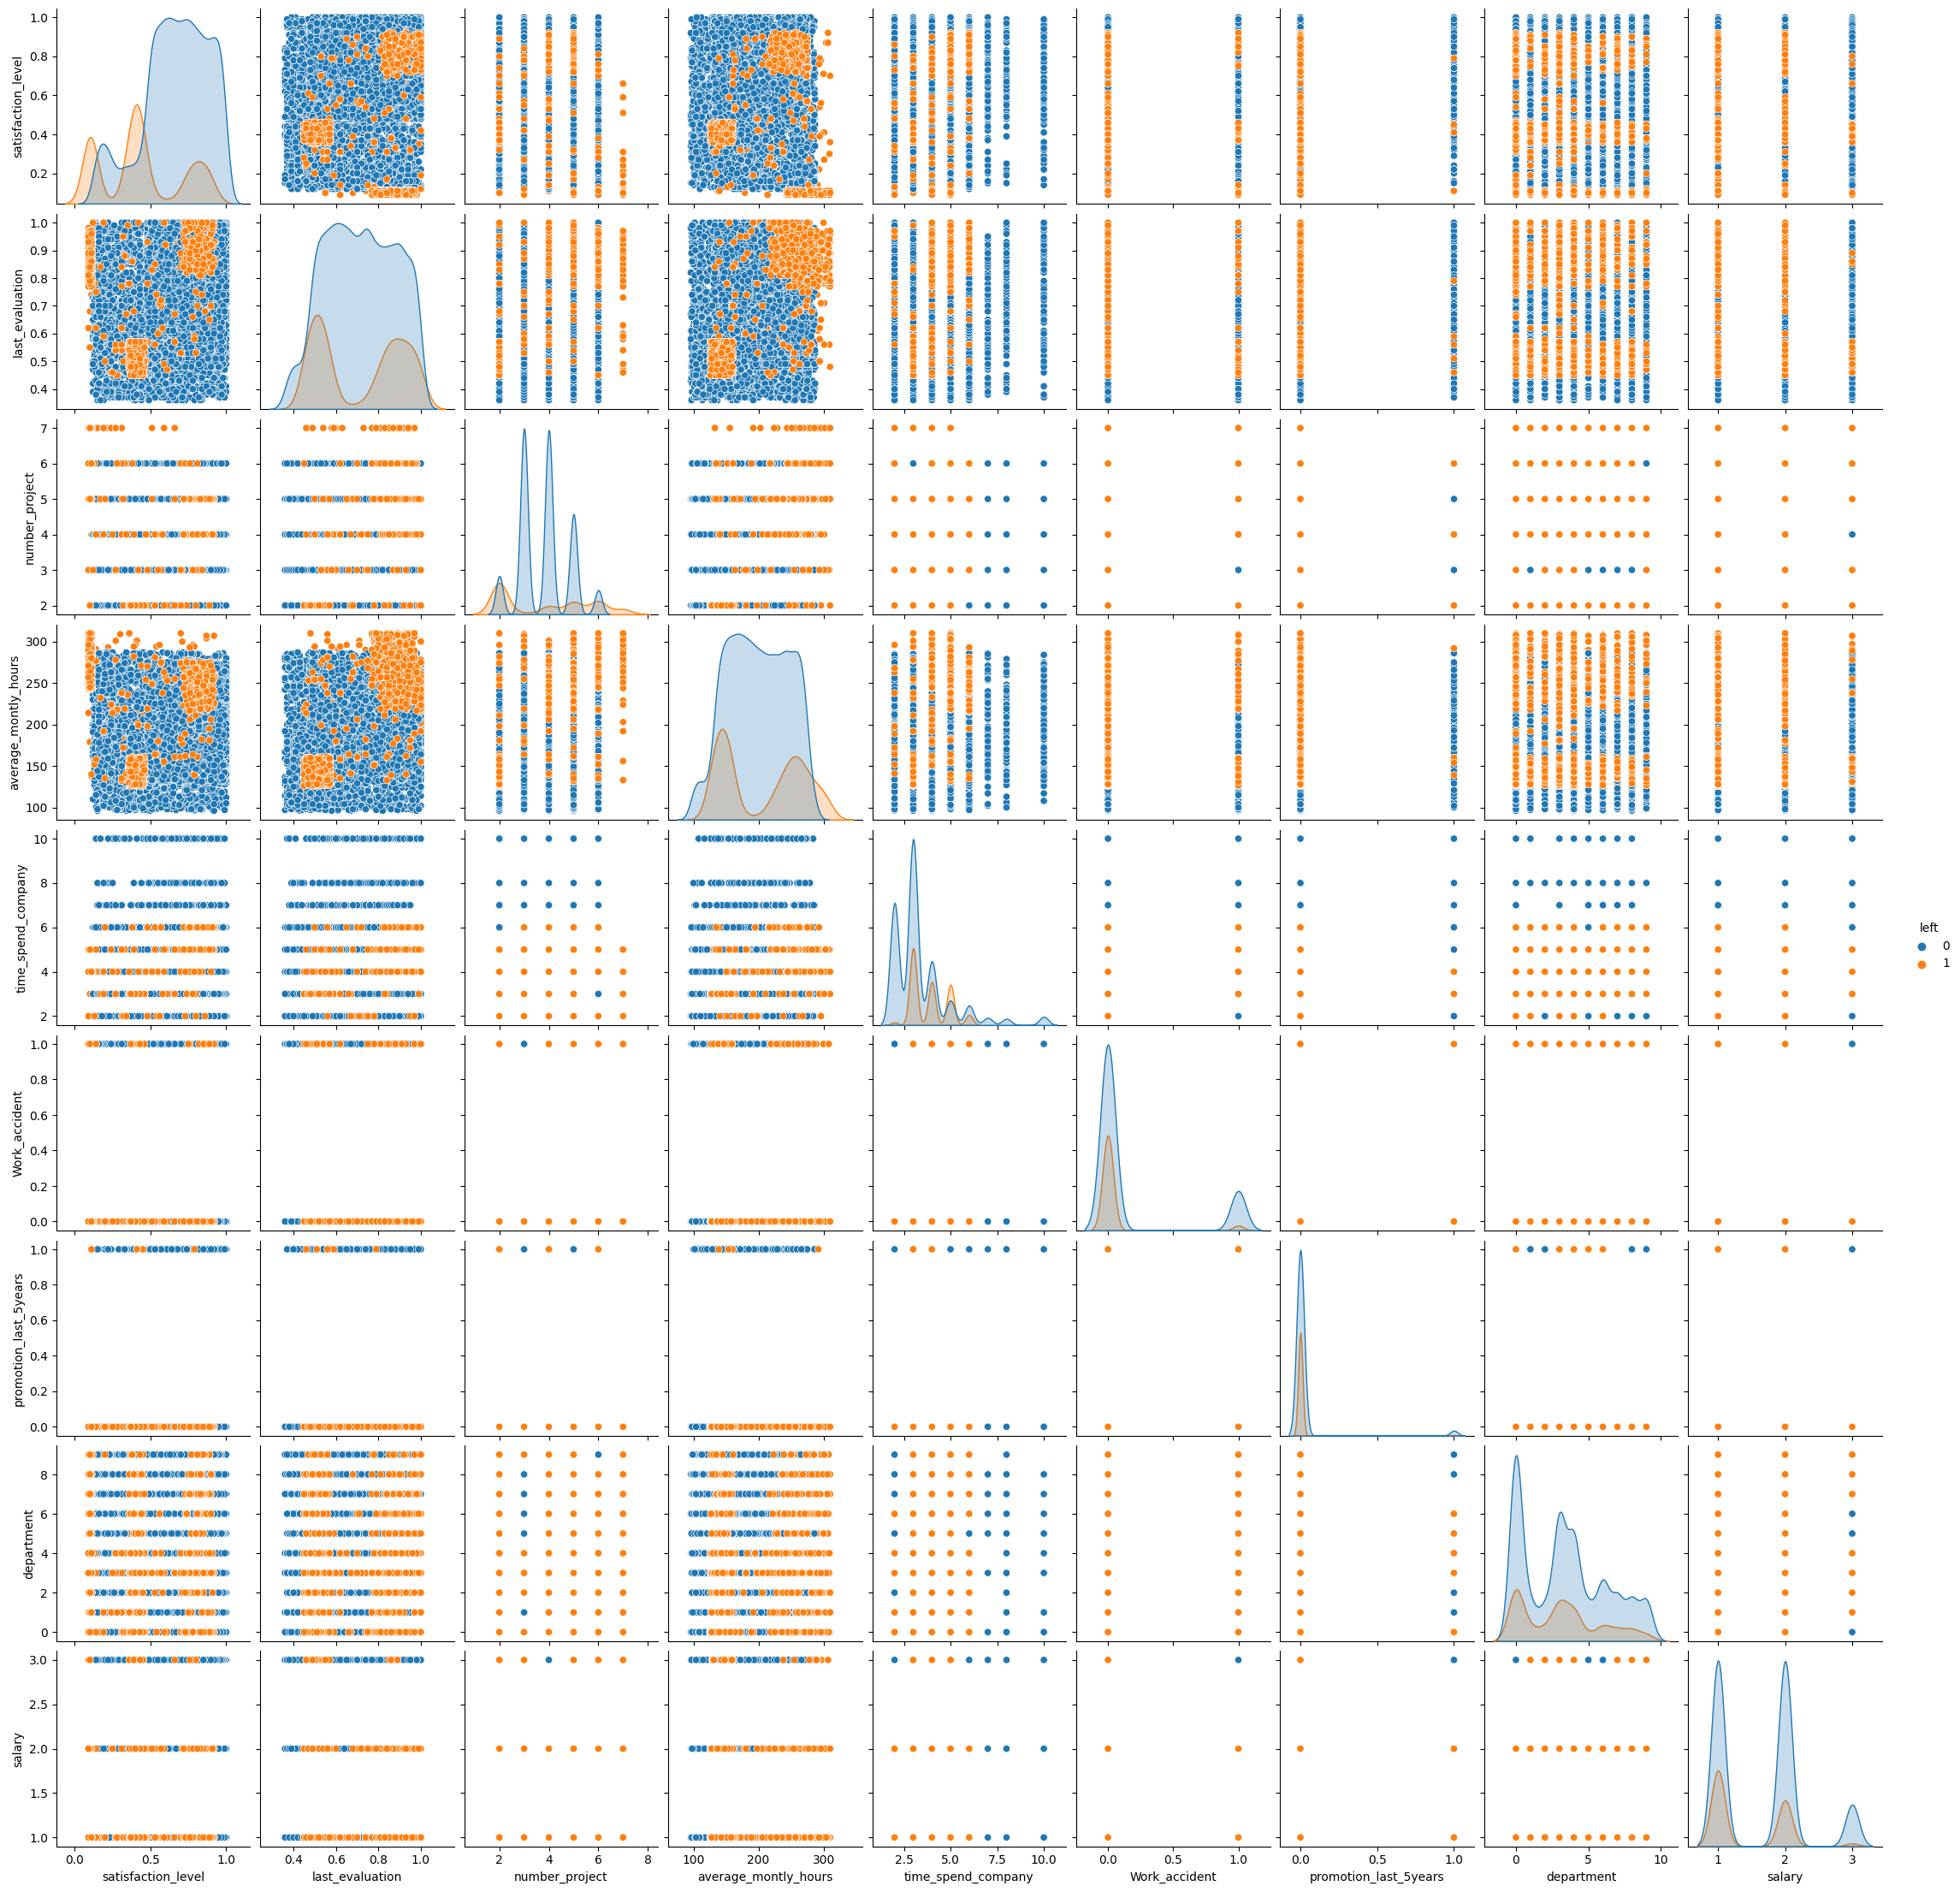

In [25]:
sns.pairplot(data=hr_copy, hue='left')

    На диагональных матрицах мы видим распределение признаков при разных значениях признака left. Они отличаются.
    Так же большой корреляции между собой признаков тоже не наблюдается, о чем мы говорили в вопросах о корреляционной матрице. 
    Признак salary включим в модель, потому что  их коэффициент корреляции - -0.16, показывает что связь между ними существует, хоть и обратная.
    
    Нам необходимо построить модель бинарной классификации, так как необходимо предугадать признак left имеющий на выходе 2 значения: 0 и 1.
    Для построения модели возьмем все признаки, кроме департмент, потому что в процессе изучения данных не было выявлено достаточной корреляции между department и left. Признак salary включим в модель, потому что коэффициент корреляции между salary и left - -0.16, показывает что связь между ними существует, хоть и обратная.
   
     Разобьем наши данные на обучающую и тестовую выборки и потроим линейную дискретную модель

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

Строим линейную дискретную модель


LinearDiscriminantAnalysis()

Правильность на обучающем наборе: 0.775
Правильность на тестируемом наборе: 0.798
Средняя квадратичная ошибка:  0.202


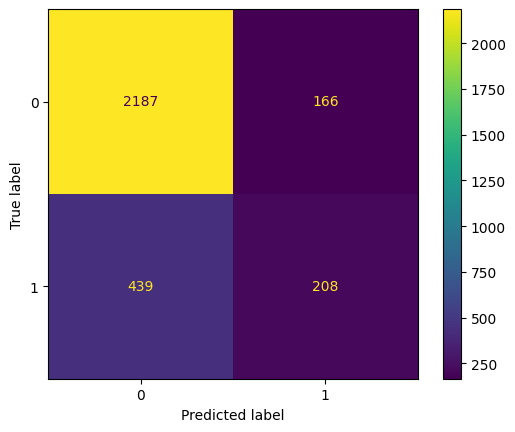

In [36]:
columns = ['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 
       'promotion_last_5years', 'salary']
X = hr_copy[columns]
y = pd.Series(hr['left'])
z = pd.concat([X, y], axis=1)

# Разбиваем на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

# Строим линейную дискретную модель
print('Строим линейную дискретную модель')
lda = LinearDiscriminantAnalysis()
results = lda.fit(X_train, y_train)
display(results)

print('Правильность на обучающем наборе: %.3f' %(lda.score(X_train, y_train)))
print('Правильность на тестируемом наборе: %.3f' %(lda.score(X_test, y_test)))

# Сделаем предсказания на тестовом наборе
y_pred = lda.predict(X_test)

#display(pd.DataFrame([y_test.values, y_pred]).T)

print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred)))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

    Достаточно невысокий правильности и точности.
    Попробуем преобразовать данные, что может улучшить модель

In [28]:
from sklearn.preprocessing import StandardScaler

Строим линейную дискретную модель на преобразованных данны


LinearDiscriminantAnalysis()

Правильность на обучающем наборе: 0.781
Правильность на тестируемом наборе: 0.763
Средняя квадратичная ошибка:  0.237
              precision    recall  f1-score   support

           0       0.80      0.91      0.85      2264
           1       0.52      0.29      0.37       736

    accuracy                           0.76      3000
   macro avg       0.66      0.60      0.61      3000
weighted avg       0.73      0.76      0.73      3000



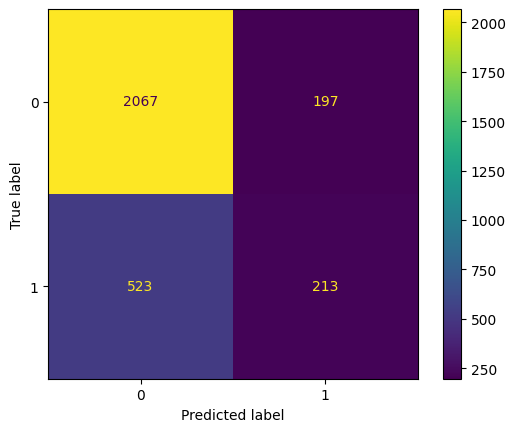

In [29]:
# Делаем преобразования (x-x.mean(axis=0))/x.std(axis=0))
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Преобразуем тестовую ячейку
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Строим линейную дискретную модель из преобразованных данных StandartScaler
print('Строим линейную дискретную модель на преобразованных данны')
lda = LinearDiscriminantAnalysis()
results = lda.fit(X_train_scaled, y_train)
display(results)

print('Правильность на обучающем наборе: %.3f' %(lda.score(X_train_scaled, y_train)))
print('Правильность на тестируемом наборе: %.3f' %(lda.score(X_test_scaled, y_test)))

# Сделаем предсказания на тестовом наборе
y_pred_scaled = lda.predict(X_test_scaled)

#display(pd.DataFrame([y_test.values, y_pred]).T)

print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred_scaled)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

     Правильность не увеличилась, поэтому попробуем построить другую модель: логистическую регрессию.
     Будем ее строить на преобразованных данных, так как это распределению чевствительно к разрядности данных.

In [30]:
from sklearn.linear_model import LogisticRegression

Строим модель логистической регрессии


LogisticRegression()

Правильность на обучающем наборе: 0.796
Правильность на тестируемом наборе: 0.796
Средняя квадратичная ошибка:  0.222
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      2264
           1       0.58      0.33      0.42       736

    accuracy                           0.78      3000
   macro avg       0.70      0.63      0.64      3000
weighted avg       0.75      0.78      0.75      3000



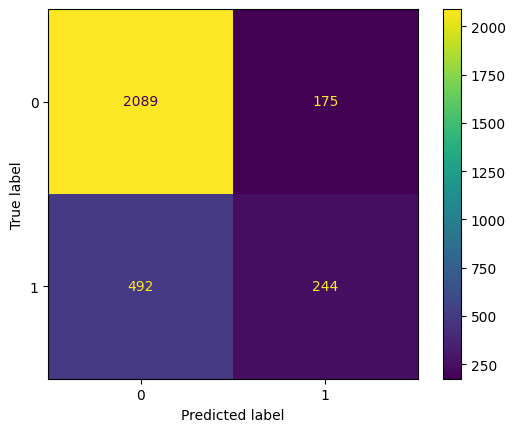

In [31]:
# Строим модель логистической регресии 
print('Строим модель логистической регрессии')
lgr = LogisticRegression()
results = lgr.fit(X_train_scaled, y_train)
display(results)
score = lgr.score(X_train_scaled, y_train)
print('Правильность на обучающем наборе: %.3f' %(score))
#score = lda.score(X_test, y_test)
print('Правильность на тестируемом наборе: %.3f' %(score))

# Получаем предcказания по тестовой выборке
y_pred = lgr.predict(X_test_scaled)
#display(pd.DataFrame([y_test.values, y_pred]).T)
print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

    Точность и правильность немного увеличились, но недостаточно. 
    Попробуем регрессионную модель ближайших соседей. Сначала построим на начальных данных потом на преобразованных, чтобы сравнить результат.

In [32]:
from sklearn.neighbors import KNeighborsClassifier

Строим модель регресионной модели ближайших соседей


KNeighborsClassifier()

Правильность на обучающем наборе: 0.962
Правильность на тестируемом наборе: 0.941
Средняя квадратичнпя ошибка:  0.059
              precision    recall  f1-score   support

           0       0.76      0.49      0.60      2291
           1       0.24      0.51      0.32       709

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.46      3000
weighted avg       0.64      0.50      0.53      3000



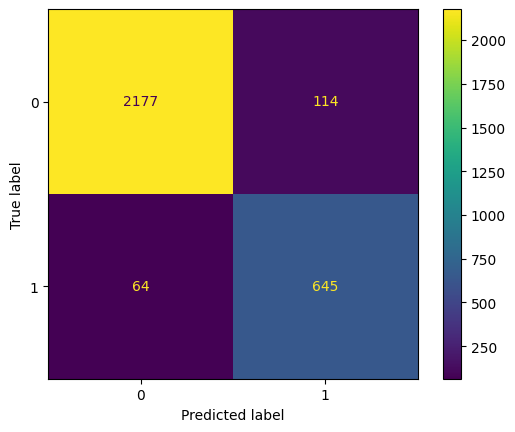

In [60]:
# Строим модель регресионной модели ближайших соседей 
print('Строим  регресионную модель ближайших соседей')
knm = KNeighborsClassifier()
results = knm.fit(X_train, y_train)
display(results)

print('Правильность на обучающем наборе: %.3f' %(knm.score(X_train, y_train)))
print('Правильность на тестируемом наборе: %.3f' %(knm.score(X_test, y_test)))

# Получаем предcказания по тестовой выборке
y_pred_knm = knm.predict(X_test)
#display(pd.DataFrame([y_test.values, y_pred]).T)
print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred_knm)))
                                                                
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knm)
print(classification_report(y_test, y_pred))                                                                

Строим  регресионную модель ближайших соседей на преобразованных данных


KNeighborsClassifier()

Правильность на обучающем наборе: 0.974
Правильность на тестируемом наборе: 0.960
Средняя квадратичная ошибка:  0.040
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      2264
           1       0.92      0.91      0.92       736

    accuracy                           0.96      3000
   macro avg       0.95      0.94      0.95      3000
weighted avg       0.96      0.96      0.96      3000



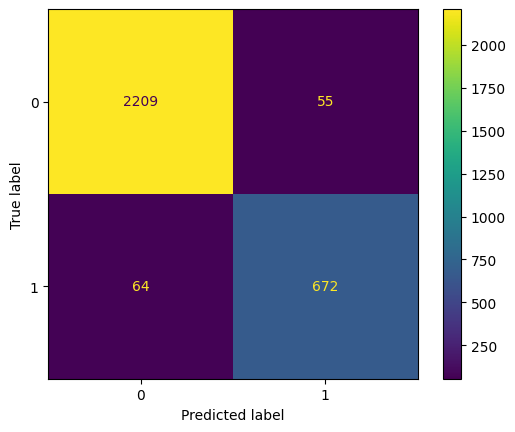

In [33]:
# Строим модель регресионной модели ближайших соседей на преобразованных данных
print('Строим  регресионную модель ближайших соседей на преобразованных данных')
knm = KNeighborsClassifier()
results = knm.fit(X_train_scaled, y_train)
display(results)
#score_scaled = knm.score(X_train_scaled, y_train)
print('Правильность на обучающем наборе: %.3f' %(knm.score(X_train_scaled, y_train)))
#score = knm.score(X_test_scaled, y_test)
print('Правильность на тестируемом наборе: %.3f' %(knm.score(X_test_scaled, y_test)))

# Получаем предcказания по тестовой выборке
y_pred = knm.predict(X_test_scaled)
#display(pd.DataFrame([y_test.values, y_pred]).T)
print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred)))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
print(classification_report(y_test, y_pred))

    На преобразованных данных модель показывает худший результат, будем использовать начальные данные.
    Найдем оптимальное значение n_neighbors для нашей модели.

In [34]:
# Строим модель регресионной модели ближайших соседей на преобразованных данных n_neighbors от 1 до 5

for neighbors in range(1, 6):
    knm = KNeighborsClassifier(n_neighbors=neighbors)
    results = knm.fit(X_train, y_train)
    display(results)
    
    print('Правильность на обучающем наборе: %.3f' %(knm.score(X_train, y_train)))
    print('Правильность на тестируемом наборе: %.3f' %(knm.score(X_test, y_test)))

# Получаем предcказания по тестовой выборке
    y_pred = knm.predict(X_test)
    print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred)))

KNeighborsClassifier(n_neighbors=1)

Правильность на обучающем наборе: 1.000
Правильность на тестируемом наборе: 0.964
Средняя квадратичная ошибка:  0.036


KNeighborsClassifier(n_neighbors=2)

Правильность на обучающем наборе: 0.991
Правильность на тестируемом наборе: 0.961
Средняя квадратичная ошибка:  0.039


KNeighborsClassifier(n_neighbors=3)

Правильность на обучающем наборе: 0.975
Правильность на тестируемом наборе: 0.947
Средняя квадратичная ошибка:  0.053


KNeighborsClassifier(n_neighbors=4)

Правильность на обучающем наборе: 0.972
Правильность на тестируемом наборе: 0.947
Средняя квадратичная ошибка:  0.053


KNeighborsClassifier()

Правильность на обучающем наборе: 0.962
Правильность на тестируемом наборе: 0.938
Средняя квадратичная ошибка:  0.062


    Наилучший результат показывет модель с n_neighbors=1, правильность - 96,5%.
    Оценим эту модель и построим ConfusionMatrix.

Строим регресионную модель ближайших соседей


KNeighborsClassifier(n_neighbors=1)

Правильность на обучающем наборе: 1.000
Правильность на тестируемом наборе: 0.964
Средняя квадратичная ошибка:  0.036
              precision    recall  f1-score   support

           0       0.97      0.94      0.96      2264
           1       0.84      0.92      0.88       736

    accuracy                           0.94      3000
   macro avg       0.91      0.93      0.92      3000
weighted avg       0.94      0.94      0.94      3000



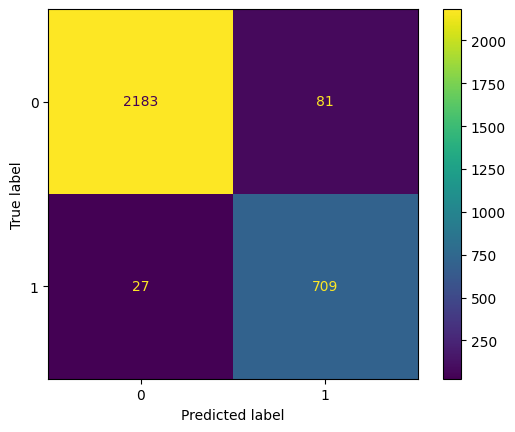

In [35]:
# Строим модель регресионной модели ближайших соседей 
print('Строим регресионную модель ближайших соседей')
knm = KNeighborsClassifier(n_neighbors=1)
results = knm.fit(X_train, y_train)
display(results)

print('Правильность на обучающем наборе: %.3f' %(knm.score(X_train, y_train)))
print('Правильность на тестируемом наборе: %.3f' %(knm.score(X_test, y_test)))

# Получаем предcказания по тестовой выборке
y_pred_knm = knm.predict(X_test)
#display(pd.DataFrame([y_test.values, y_pred]).T)
print('Средняя квадратичная ошибка:  %.3f' %(mean_squared_error(y_test, y_pred_knm)))
                                                                
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knm)
print(classification_report(y_test, y_pred))                                                                

#### Вывод    
    Мы построили нескольно моделей: линейную дискретную модель, модель логистической регрессии и регресионную модель ближайших соседей. Наиболее высокую точность и правильность показала последняя модель с аргументом n_neighbors=1, 0.965 и 0.97, что очень хороший результат для модели. Эту модель выберем для предсказания: уволился ли сотрудник на основе имеющихся факторов.